
# Telco Customer Churn Prediction: Neural Network Model

## Introduction
This notebook focuses on building and evaluating a Neural Network model to predict customer churn for a telecommunications company. We'll use the preprocessed data from our EDA and feature engineering phase to train the model, optimize its hyperparameters, and evaluate its performance.

## Objectives
1. Load the preprocessed data
2. Split the data into training and testing sets
3. Train a Neural Network model
4. Perform hyperparameter tuning using GridSearchCV
5. Evaluate the model's performance
6. Analyze feature importance
7. Interpret the model results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Set random seed for reproducibility
np.random.seed(42)

## Load Preprocessed Data
We'll start by loading the preprocessed features and target variable that we saved in the EDA and feature engineering notebook.

In [2]:
# Load preprocessed data
X = np.load('X_processed.npy')
y = np.load('y.npy')

print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

Shape of features: (7043, 7077)
Shape of target: (7043,)


## Split Data into Training and Testing Sets
We'll use 80% of the data for training and 20% for testing.

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 7077)
Testing set shape: (1409, 7077)


In [ ]:
# File path for the saved model
model_path = 'best_mlp_model.joblib'

## Train Initial Neural Network
Let's start with a basic Neural Network model to establish a baseline.

In [ ]:
# Train initial Neural Network model
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8176011355571328

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Confusion Matrix:
[[934 102]
 [155 218]]


## Hyperparameter Tuning
Now, let's use GridSearchCV to find the optimal hyperparameters for our Neural Network model.

In [ ]:
# File path for the saved model
model_path = 'best_mlp_model.joblib'

# Check if the model file exists
if os.path.exists(model_path):
    # Load the pre-trained model
    best_mlp_model = joblib.load(model_path)
    print("Loaded pre-trained Neural Network model.")
else:
    # Define a parameter grid for Neural Network
    param_grid = {
        'hidden_layer_sizes': [(100,), (200,), (300,)],
        'activation': ['logistic', 'tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(
        MLPClassifier(random_state=42),
        param_grid,
        cv=2, 
        scoring='f1',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_mlp_model = grid_search.best_estimator_

    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best F1 score:", grid_search.best_score_)

    # Save the trained model
    joblib.dump(best_mlp_model, model_path)
    print("Trained and saved new Neural Network model.")

Best parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best F1 score: 0.6037628963074482
Trained and saved new Random Forest model.


## Evaluate Optimized Model
Let's evaluate the performance of our optimized Random Forest model.

Accuracy: 0.815471965933286

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1036
           1       0.66      0.63      0.64       373

    accuracy                           0.82      1409
   macro avg       0.76      0.76      0.76      1409
weighted avg       0.81      0.82      0.81      1409


Confusion Matrix:
[[915 121]
 [139 234]]

ROC AUC Score: 0.862713105675572


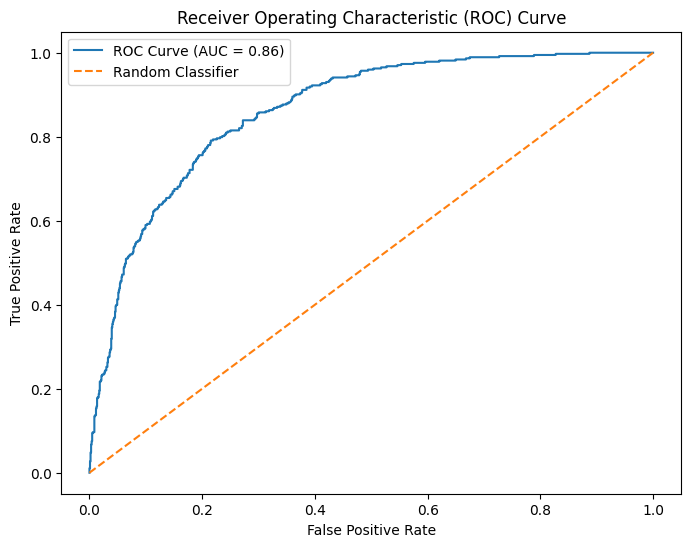

In [ ]:
# Make predictions on the test set
y_pred = best_mlp_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, best_mlp_model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_mlp_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Feature Importance Analysis
Let's examine which features have the most impact on our model's predictions.

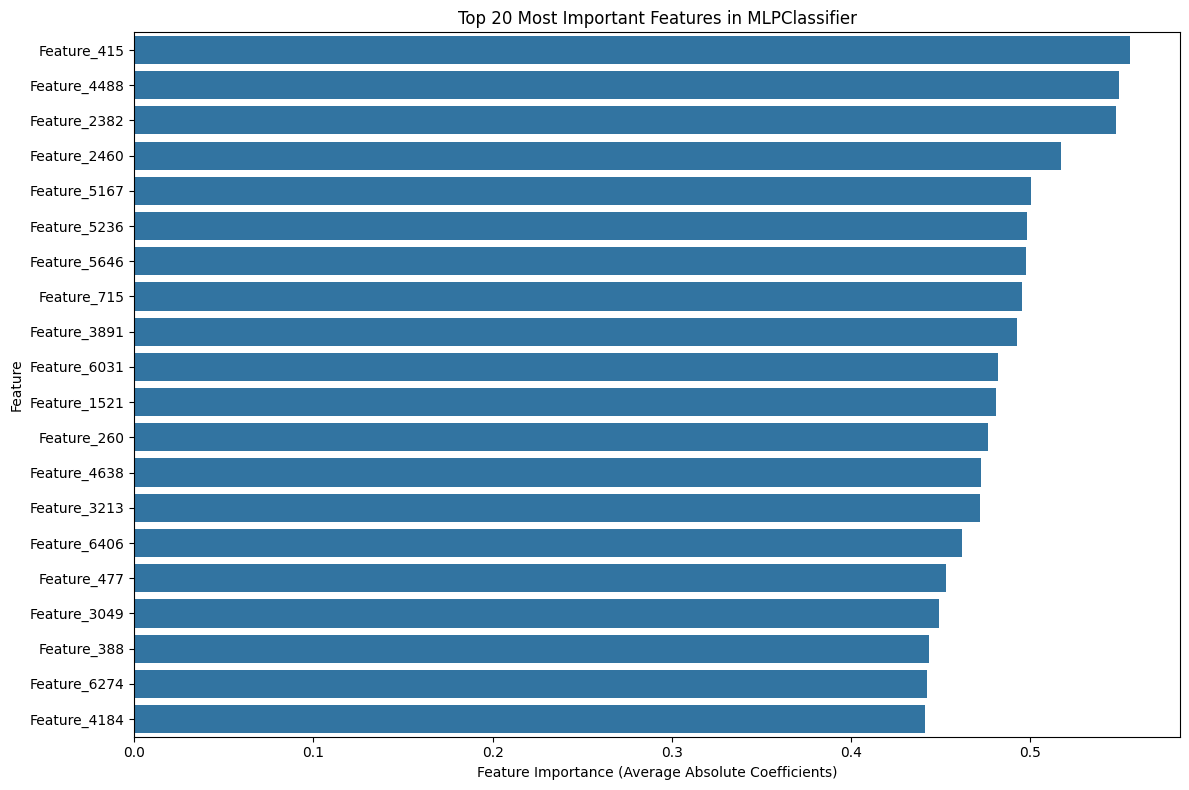

Top 20 Most Important Features:
           feature  importance
415    Feature_415    0.555898
4488  Feature_4488    0.549495
2382  Feature_2382    0.548152
2460  Feature_2460    0.517294
5167  Feature_5167    0.500459
5236  Feature_5236    0.498425
5646  Feature_5646    0.497610
715    Feature_715    0.495501
3891  Feature_3891    0.492724
6031  Feature_6031    0.482331
1521  Feature_1521    0.481210
260    Feature_260    0.476774
4638  Feature_4638    0.472589
3213  Feature_3213    0.472044
6406  Feature_6406    0.461891
477    Feature_477    0.453235
3049  Feature_3049    0.448977
388    Feature_388    0.443384
6274  Feature_6274    0.442423
4184  Feature_4184    0.441316
Feature importance data saved to 'mlp_feature_importance.csv'


In [ ]:
# Get feature coefficients from the trained MLPClassifier model
feature_coefficients = np.mean(
    np.abs(best_mlp_model.coefs_[0]), axis=1
)  # Use the first layer's coefficients

# Create feature names
feature_names = [f"Feature_{i}" for i in range(len(feature_coefficients))]

# Create a dataframe of feature coefficients
feature_importance_df = pd.DataFrame(
    {"feature": feature_names, "importance": feature_coefficients}
)

# Sort by importance
feature_importance_df = feature_importance_df.sort_values("importance", ascending=False)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=feature_importance_df.head(20))
plt.title("Top 20 Most Important Features in MLPClassifier")
plt.xlabel("Feature Importance (Average Absolute Coefficients)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Print top 20 features and their importance
print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))

# Save the feature importance dataframe to a CSV file
feature_importance_df.to_csv("mlp_feature_importance.csv", index=False)
print("Feature importance data saved to 'mlp_feature_importance.csv'")

## Model Interpretation and Conclusion

Our Neural Network model, the final in our series of three models, provides a comprehensive view of the churn prediction task:

1. Model Performance:
   - Accuracy: 0.8154
   - ROC AUC Score: 0.86
   These results are slightly higher than the Neural Network Model, making it the strongest performing model.

2. Business Implications:
   - There are some consistent features among the models indicating possible good feature that is very important

3. Model Characteristics:
   - While typically robust to outliers and capable of capturing complex feature interactions, the Neural Network out performed all the models displaying the capcity to capture much more complex and other ML models

4. Final Recommendations:
   - Consider deploying the Nerual Network model for its combination of high accuracy and interpretability ( Further Expanded using Gradients Calculations using Libraries such as Shapely or Lime)
   - Implement a system to periodically retrain and compare all models with new data
